In [1]:
print("Hello world")

Hello world


# Libraries         
---

In [2]:
# 기본
import pandas as pd
import numpy as np 
import os
import warnings
warnings.filterwarnings("ignore")

# 시각화 
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns

# 모델
from sklearn.model_selection import (train_test_split, 
                                     KFold, 
                                     StratifiedKFold,
                                     GridSearchCV,
                                     RandomizedSearchCV)

from sklearn.tree import (DecisionTreeClassifier, 
                          DecisionTreeRegressor)

from sklearn.ensemble import (RandomForestClassifier, 
                              RandomForestRegressor)

from sklearn.svm import SVC

from xgboost import XGBClassifier

# sampling
from imblearn.over_sampling import SMOTE
from collections import Counter

# report
from sklearn import metrics
# matrix = metrics.confusion_matrix(y_test, y_pred)
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score

#encoder, scaler
from sklearn.preprocessing import (LabelEncoder, 
                                   OneHotEncoder, 
                                   StandardScaler,
                                   MinMaxScaler)

# imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# test
import statsmodels.api as sm 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Read the Data         
---

In [3]:
plt.rcParams['axes.unicode_minus'] = False
custom_params = {"axes.spines.right": False, "axes.spines.top": False}

sns.set_theme(context = 'talk',  
              style = 'darkgrid',  
              font = 'Malgun Gothic', 
              font_scale = 1.2,         
              rc = custom_params) 

In [4]:
cur_dir = os.getcwd()

for root, dirs, files in os.walk(cur_dir):
    if '.git' not in root:
        print(root, files)

c:\Users\user\Documents\ML ['.gitignore', '004. 만료및탈퇴 회원 예측_보완.ipynb', '1company_rating.ipynb', '1Heart_Disease.ipynb', '1Heart_Disease_re.ipynb', '1Insurance_charge.ipynb', '1project_pre.ipynb', 'graph.txt', 'Libraries.ipynb', 'modeling checklist.ipynb', 'Mv_txt.ipynb', 'pre.txt', 'scikit-learn.ipynb', 'SMOTE-Oversampling.ipynb', 'validation.ipynb', '분석기법별 특징.png']
c:\Users\user\Documents\ML\.vscode ['settings.json']
c:\Users\user\Documents\ML\data ['bestsellers with categories.csv', 'Book_description.npy', 'Companies_Dataset.csv', 'Companies_Dataset.xlsx', 'heart_disease_uci.csv', 'insurance.csv']


In [5]:
data_list = os.listdir(cur_dir + "\data")
Dataset = {}

for data in data_list:
    if '.csv' in data:
        Dataset[data[:-4]] = pd.read_csv(cur_dir + f"\data\{data}")

In [6]:
hdu = Dataset['heart_disease_uci']
dataset = hdu.copy()

In [7]:
dataset.head(2)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2


# Data info         
---

In [8]:
df = dataset

In [9]:
df_null = df.isna().sum().reset_index()
df_nunique = df.nunique().reset_index()
df_dtypes = df.dtypes.reset_index()

df_info = pd.merge(df_null, df_nunique, on = "index", how = "left")
df_info = pd.merge(df_info, df_dtypes, on = 'index', how = "left")

df_info['null_ratio'] = round(df_info['0_x'] / len(df) * 100, 2).astype('str') + "%"
df_info = df_info.rename(columns = {"index":"col",'0_x':"null_count","0_y":"nunique_count",0:"dtypes"})
df_info = df_info[["col", "null_count", "null_ratio", "nunique_count", "dtypes"]]
print(f"Data\n\nIndex: {df.shape[0]}\nColumns: {df.shape[1]}")
df_info

Data

Index: 920
Columns: 16


,col,null_count,null_ratio,nunique_count,dtypes
0,id,0,0.0%,920,int64
1,age,0,0.0%,50,int64
2,sex,0,0.0%,2,object
3,dataset,0,0.0%,4,object
4,cp,0,0.0%,4,object
5,trestbps,59,6.41%,61,float64
6,chol,30,3.26%,217,float64
7,fbs,90,9.78%,2,object
8,restecg,2,0.22%,3,object
9,thalch,55,5.98%,119,float64


In [10]:
df.duplicated().sum()

0

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


# Data EDA       
---

In [12]:
df.head(2)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2


In [13]:
df = df.drop(columns = {'id', 'dataset'})

In [14]:
numeric_df = df.select_dtypes(include = "number")
numeric_df.head(2)

,age,trestbps,chol,thalch,oldpeak,ca,num
0,63,145.0,233.0,150.0,2.3,0.0,0
1,67,160.0,286.0,108.0,1.5,3.0,2


In [15]:
for fig, col in enumerate((numeric_df)):
    fig = px.histogram(numeric_df[col],
                       marginal = 'box',
                       color_discrete_sequence = ["#3F72AF"],
                       nbins = df[col].nunique())
    fig.update_layout(title = col, bargap = 0.1)
    fig.show()

In [16]:
df.loc[df.trestbps == 0, 'trestbps'] = np.nan

In [17]:
df.loc[df.chol == 0, 'chol'] = np.nan

In [18]:
df.loc[df.oldpeak < -1.5, 'oldpeak'] = np.nan

> 총 콜레스테롤과 혈압이 0일 수가 없으므로 결측치 처리

> 심전도 수치가 비정상적인 수치로 보여 결측치 처리

In [19]:
for fig, col in enumerate((numeric_df)):
    fig = px.histogram(numeric_df[col],
                       marginal = 'box',
                       color_discrete_sequence = ["#3F72AF"],
                       nbins = df[col].nunique())
    fig.update_layout(title = col, bargap = 0.1)
    fig.show()

In [20]:
categorycal_df = df.select_dtypes(include = 'object')
categorycal_df.head(2)

,sex,cp,fbs,restecg,exang,slope,thal
0,Male,typical angina,True,lv hypertrophy,False,downsloping,fixed defect
1,Male,asymptomatic,False,lv hypertrophy,True,flat,normal


In [21]:
for fig, col in enumerate((categorycal_df)):
    fig = px.histogram(data_frame = df[col],
                       marginal = 'rug',
                       color_discrete_sequence = ["#3F72AF"])
    fig.update_layout(title = col)
    fig.show()

In [22]:
px.scatter(data_frame= df[['age','num','sex']], x = 'age', y = 'num', color = 'sex',
           marginal_x = 'histogram',
           marginal_y = 'rug')

In [23]:
px.scatter(data_frame= df[['age','num','sex','trestbps']], x = 'age', y = 'trestbps', color = 'num', symbol = 'sex',
           marginal_x = 'histogram',
           marginal_y = 'rug')

<Axes: >

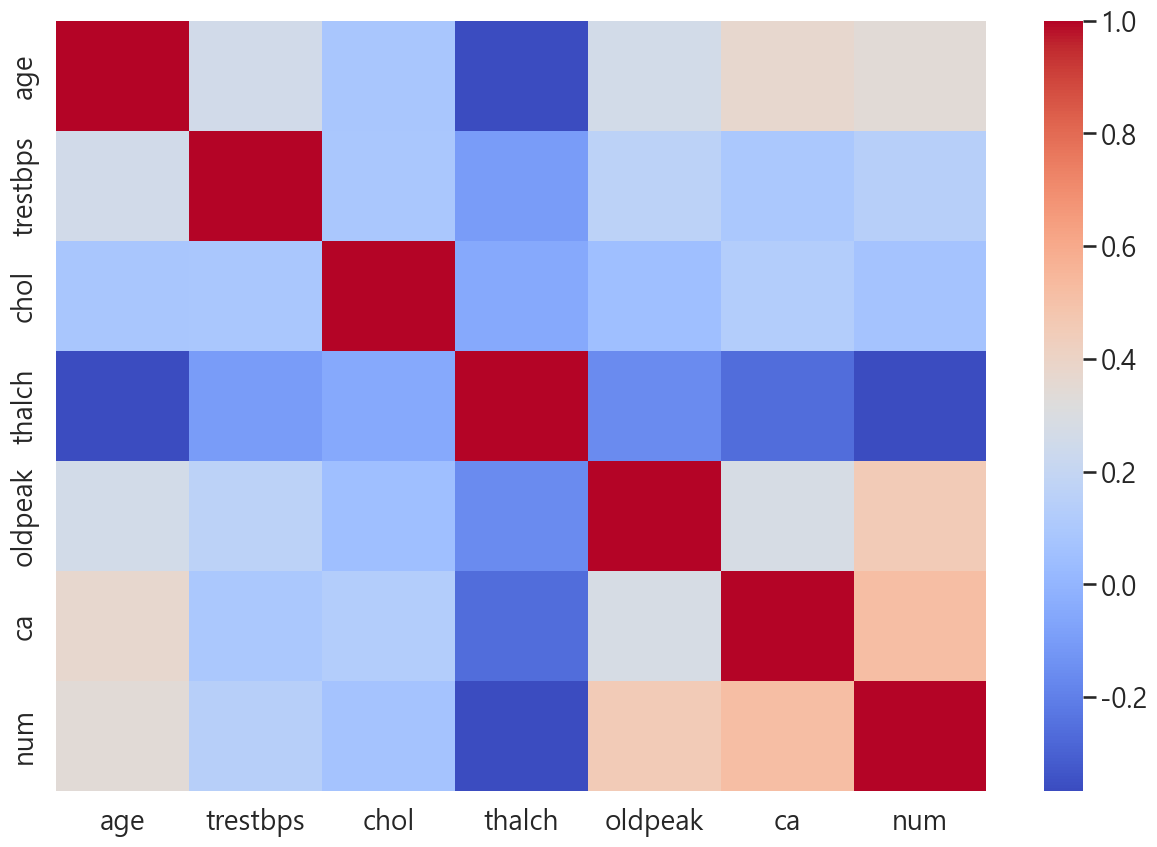

In [24]:
plt.figure(figsize = (15,10))
sns.heatmap(df.select_dtypes(include = "number").corr(), cmap = "coolwarm")

In [25]:
df.select_dtypes(include = "number").corr()[df.select_dtypes(include = "number").corr() > 0.8].fillna('')

,age,trestbps,chol,thalch,oldpeak,ca,num
age,1.0,,,,,,
trestbps,,1.0,,,,,
chol,,,1.0,,,,
thalch,,,,1.0,,,
oldpeak,,,,,1.0,,
ca,,,,,,1.0,
num,,,,,,,1.0


In [26]:
df[['exang','fbs']] = df[['exang','fbs']].astype('bool')

# Missing value          
---

In [27]:
df_null = df.isna().sum().reset_index()
df_nunique = df.nunique().reset_index()
df_dtypes = df.dtypes.reset_index()

df_info = pd.merge(df_null, df_nunique, on = "index", how = "left")
df_info = pd.merge(df_info, df_dtypes, on = 'index', how = "left")

df_info['null_ratio'] = round(df_info['0_x'] / len(df) * 100, 2).astype('str') + "%"
df_info = df_info.rename(columns = {"index":"col",'0_x':"null_count","0_y":"nunique_count",0:"dtypes"})
df_info = df_info[["col", "null_count", "null_ratio", "nunique_count", "dtypes"]]
print(f"Data\n\nIndex: {df.shape[0]}\nColumns: {df.shape[1]}")
df_info

Data

Index: 920
Columns: 14


,col,null_count,null_ratio,nunique_count,dtypes
0,age,0,0.0%,50,int64
1,sex,0,0.0%,2,object
2,cp,0,0.0%,4,object
3,trestbps,60,6.52%,60,float64
4,chol,202,21.96%,216,float64
5,fbs,0,0.0%,2,bool
6,restecg,2,0.22%,3,object
7,thalch,55,5.98%,119,float64
8,exang,0,0.0%,2,bool
9,oldpeak,64,6.96%,51,float64


<Axes: >

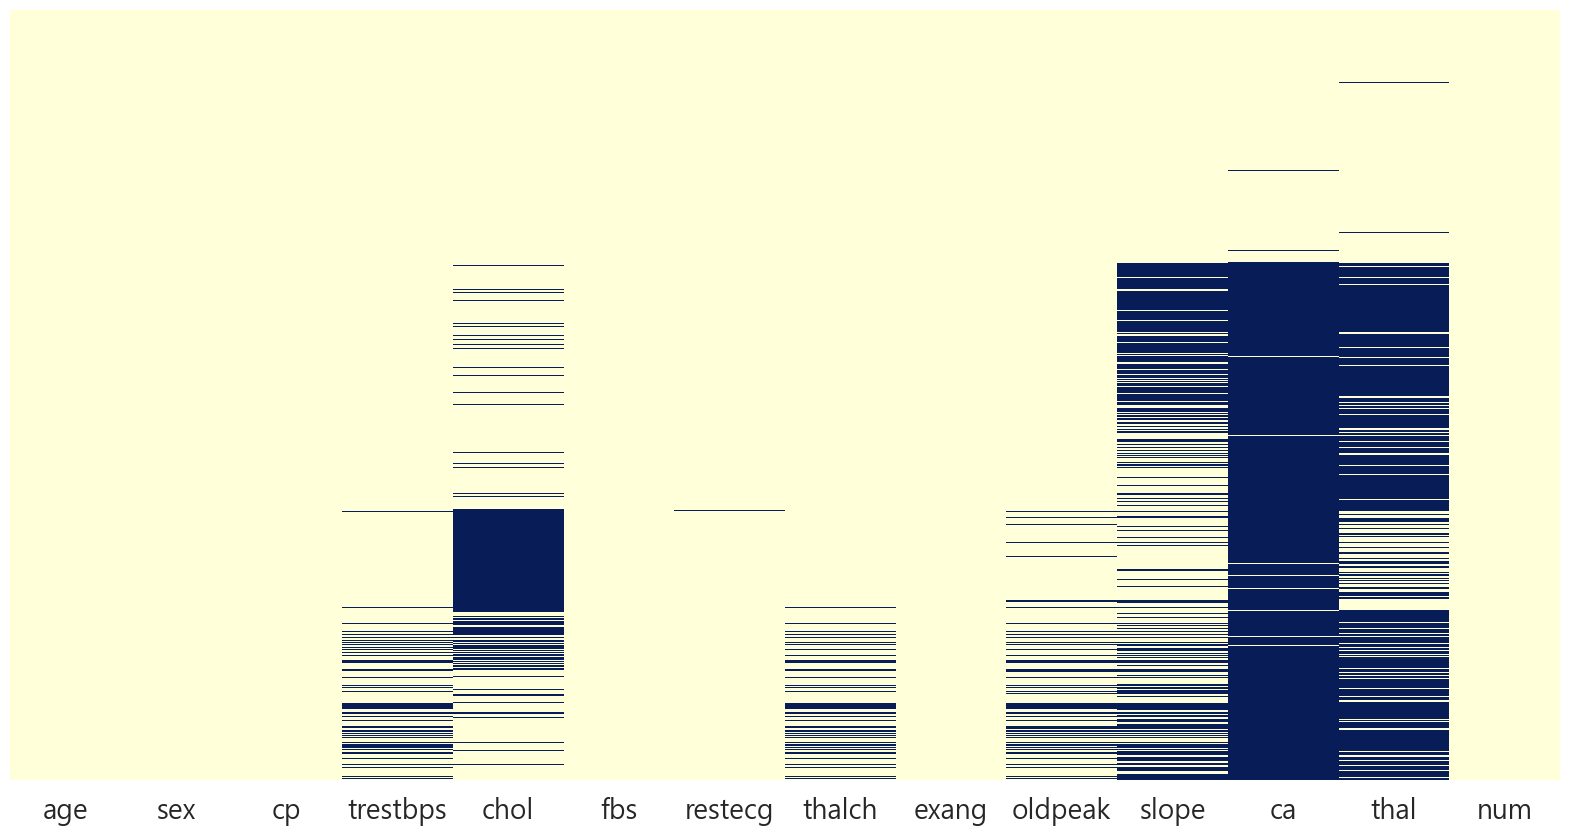

In [28]:
plt.figure(figsize = (20, 10))
sns.heatmap(data = df.isna(), yticklabels = False, cbar = False, cmap = 'YlGnBu')

In [29]:
isna_df_col = []
for col in df.isna().sum()[df.isna().sum() > 0].sort_values(ascending = False).index:
    isna_df_col.append(col)

isna_df_col

['ca', 'thal', 'slope', 'chol', 'oldpeak', 'trestbps', 'thalch', 'restecg']

In [30]:
df[isna_df_col]

,ca,thal,slope,chol,oldpeak,trestbps,thalch,restecg
0,0.0,fixed defect,downsloping,233.0,2.3,145.0,150.0,lv hypertrophy
1,3.0,normal,flat,286.0,1.5,160.0,108.0,lv hypertrophy
2,2.0,reversable defect,flat,229.0,2.6,120.0,129.0,lv hypertrophy
3,0.0,normal,downsloping,250.0,3.5,130.0,187.0,normal
4,0.0,normal,upsloping,204.0,1.4,130.0,172.0,lv hypertrophy
...,...,...,...,...,...,...,...,...
915,NaN,NaN,NaN,333.0,0.0,127.0,154.0,st-t abnormality
916,NaN,NaN,NaN,139.0,NaN,NaN,NaN,st-t abnormality
917,NaN,fixed defect,NaN,223.0,0.0,122.0,100.0,st-t abnormality
918,NaN,NaN,NaN,385.0,NaN,NaN,NaN,lv hypertrophy


In [31]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps', 'chol', 'restecg', 'thalch', 'oldpeak', 'slope', 'ca', 'thal']

In [32]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

> iterative imputer (model = random forest)

In [33]:
def cat_missing(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(columns = passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=777), add_indicator = True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    X = df_null.drop(columns = passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def num_missing(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(columns = passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=777), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)
    
    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [34]:
for col in missing_data_cols:
    if col in categorical_cols:
        df[col] = cat_missing(col)
    elif col in numeric_cols:
        df[col] = num_missing(col)
    else:
        pass

In [35]:
df_null = df.isna().sum().reset_index()
df_nunique = df.nunique().reset_index()
df_dtypes = df.dtypes.reset_index()

df_info = pd.merge(df_null, df_nunique, on = "index", how = "left")
df_info = pd.merge(df_info, df_dtypes, on = 'index', how = "left")

df_info['null_ratio'] = round(df_info['0_x'] / len(df) * 100, 2).astype('str') + "%"
df_info = df_info.rename(columns = {"index":"col",'0_x':"null_count","0_y":"nunique_count",0:"dtypes"})
df_info = df_info[["col", "null_count", "null_ratio", "nunique_count", "dtypes"]]
print(f"Data\n\nIndex: {df.shape[0]}\nColumns: {df.shape[1]}")
df_info

Data

Index: 920
Columns: 14


,col,null_count,null_ratio,nunique_count,dtypes
0,age,0,0.0%,50,int64
1,sex,0,0.0%,2,object
2,cp,0,0.0%,4,object
3,trestbps,0,0.0%,118,float64
4,chol,0,0.0%,414,float64
5,fbs,0,0.0%,2,bool
6,restecg,0,0.0%,3,object
7,thalch,0,0.0%,173,float64
8,exang,0,0.0%,2,bool
9,oldpeak,0,0.0%,113,float64


In [36]:
for fig, col in enumerate((df)):
    fig = px.histogram(data_frame = df[col],
                       marginal = 'box',
                       color_discrete_sequence = ['#3F72AF'],
                       nbins = df[col].nunique())
    fig.update_layout(title = col, bargap = 0.1)
    fig.show()

In [37]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.00,233.0,True,lv hypertrophy,150.00,False,2.300,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.00,286.0,False,lv hypertrophy,108.00,True,1.500,flat,3.0,normal,2
2,67,Male,asymptomatic,120.00,229.0,False,lv hypertrophy,129.00,True,2.600,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.00,250.0,False,normal,187.00,False,3.500,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.00,204.0,False,lv hypertrophy,172.00,False,1.400,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.00,333.0,True,st-t abnormality,154.00,False,0.000,upsloping,0.0,normal,1
916,62,Male,typical angina,138.09,139.0,False,st-t abnormality,143.56,True,1.597,flat,0.0,normal,0
917,55,Male,asymptomatic,122.00,223.0,True,st-t abnormality,100.00,False,0.000,flat,1.0,fixed defect,2
918,58,Male,asymptomatic,144.14,385.0,True,lv hypertrophy,143.97,True,1.591,flat,0.0,reversable defect,0


In [38]:
df = df.drop(columns = {'sex'}, axis = 1).join(pd.get_dummies(df.sex))

In [39]:
def thal(thal):
    if thal == 'normal':
        return 0
    if thal == 'reversable defect':
        return 1
    if thal == 'fixed defect':
        return 2


def slope(slope):
    if slope == 'flat':
        return 0
    if slope == 'upsloping':
        return 1
    if slope == 'downsloping':
        return 2
    
def restecg(restecg):
    if restecg == "normal":
        return 0
    if restecg == "lv hypertrophy":
        return 1
    if restecg == "st-t abnormality":
        return 2
    
def cp(cp):
    if cp == "asymptomatic":
        return 0
    if cp == "non-anginal":
        return 0
    if cp == "atypical angina":
        return 1
    if cp == "typical angina":
        return 2    
    
df.thal = df.thal.apply(thal)
df.slope = df.slope.apply(slope)
df.restecg = df.restecg.apply(restecg)
df.cp = df.cp.apply(cp)

In [44]:
X = df.drop(columns = "num")

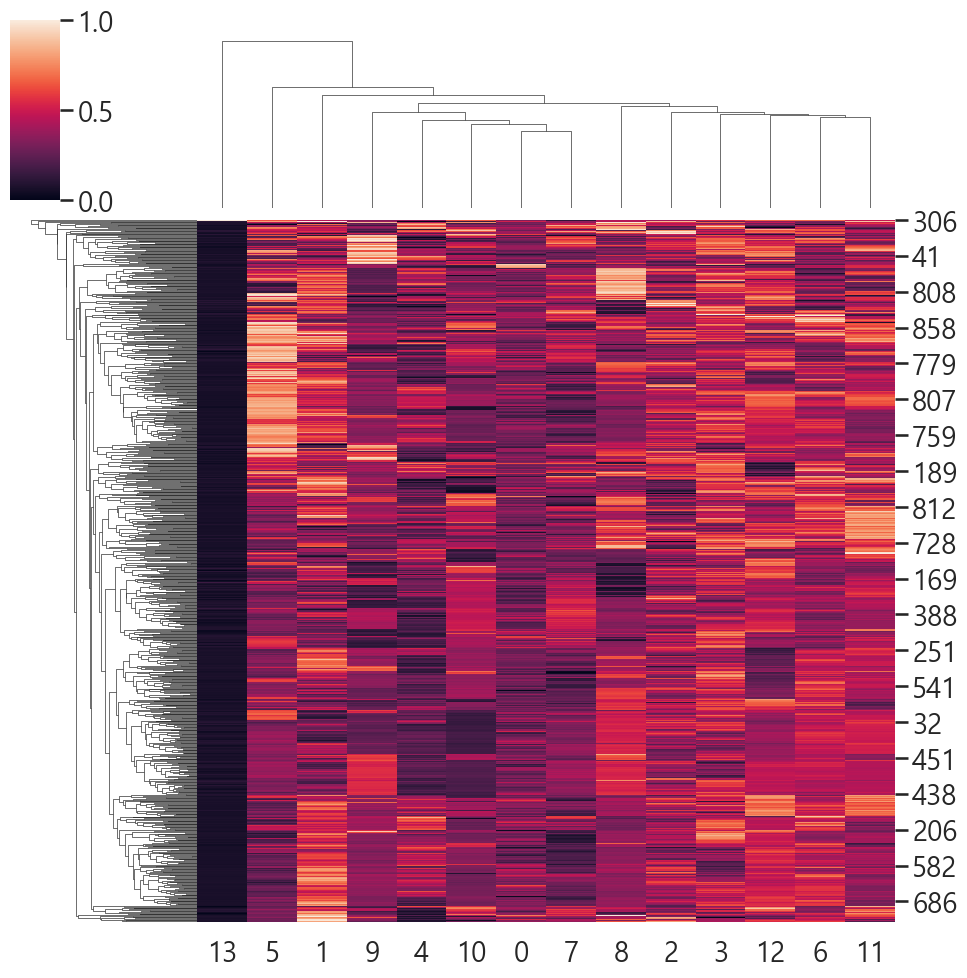

In [53]:
pca = PCA(n_components = 14, random_state = 777)
X_pca = pca.fit_transform(X)
df_X = pd.DataFrame(X_pca)
sns.clustermap(df_X, standard_scale = 1)
plt.show()

<Axes: >

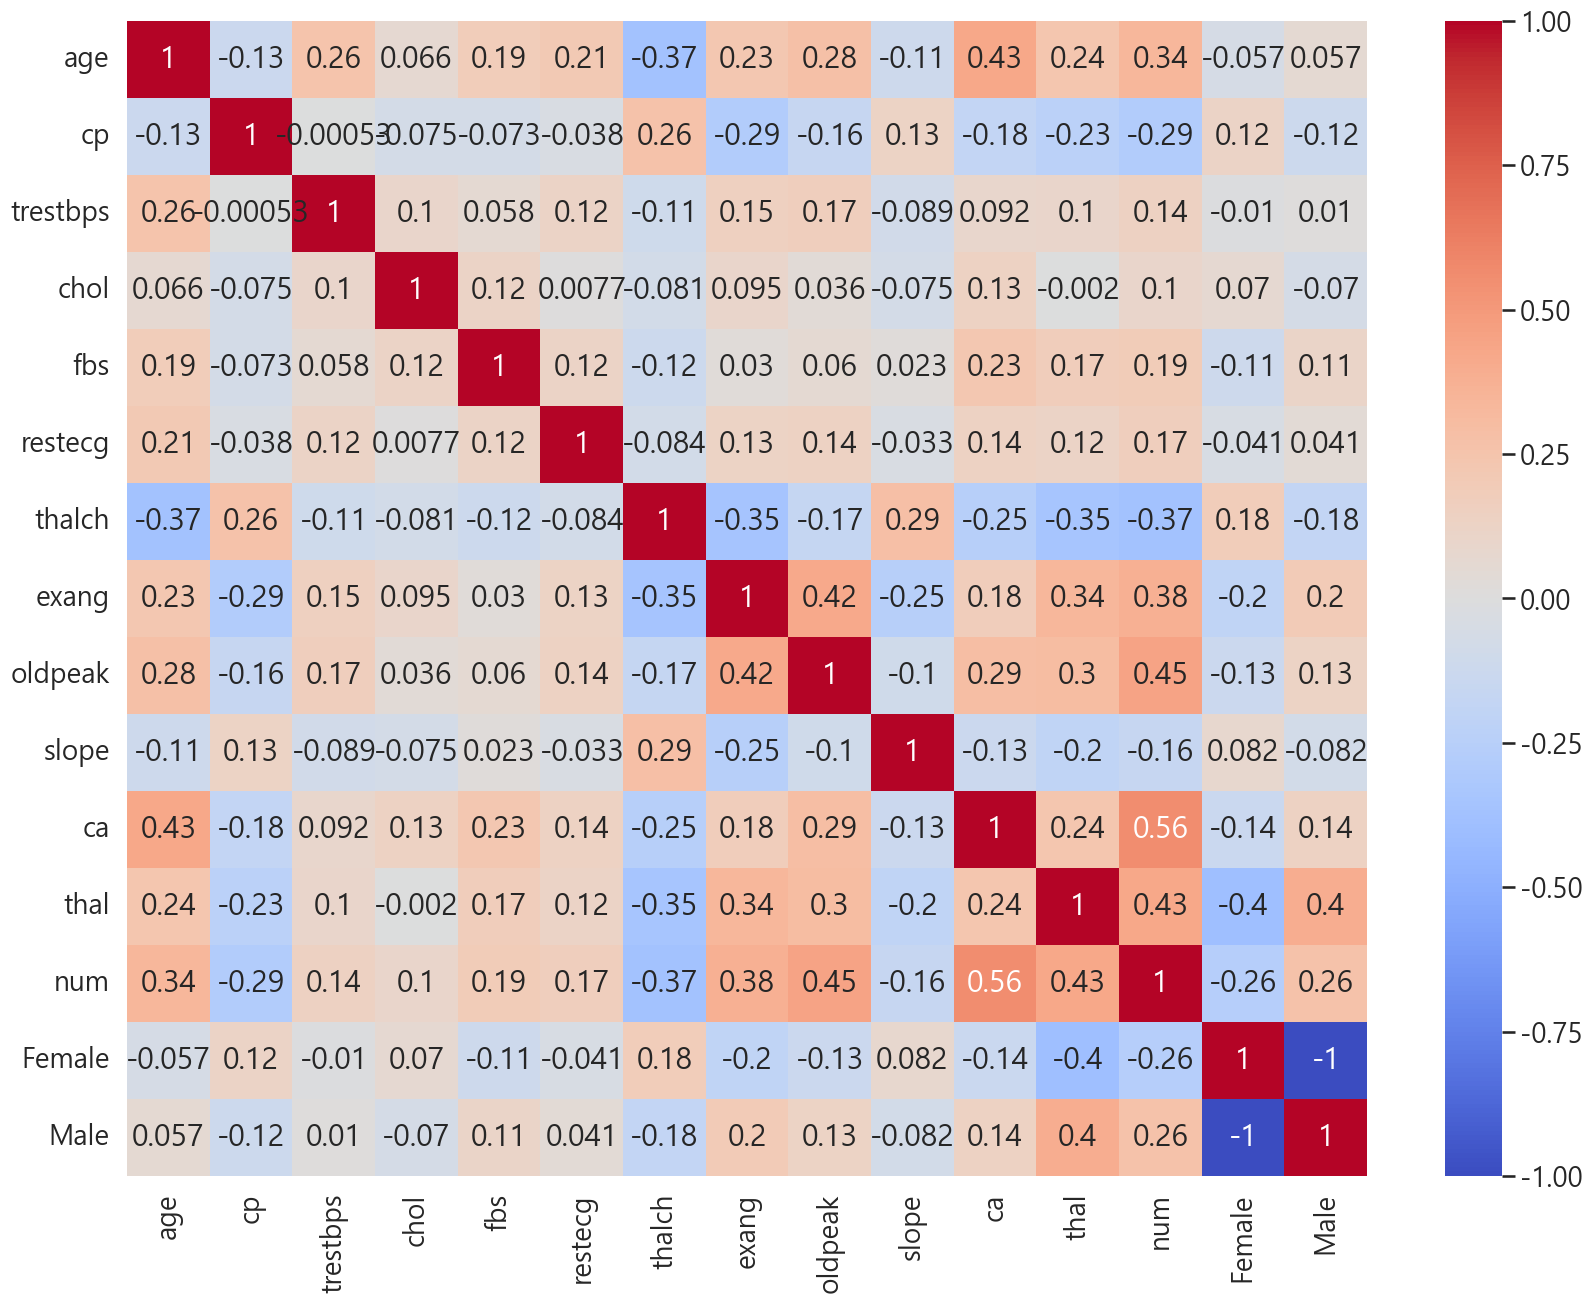

In [57]:
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(),cmap = "coolwarm", annot = True)

In [58]:
df.corr()[df.corr() > 0.7].fillna(' ')

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,Female,Male
age,1.0,,,,,,,,,,,,,,
cp,,1.0,,,,,,,,,,,,,
trestbps,,,1.0,,,,,,,,,,,,
chol,,,,1.0,,,,,,,,,,,
fbs,,,,,1.0,,,,,,,,,,
restecg,,,,,,1.0,,,,,,,,,
thalch,,,,,,,1.0,,,,,,,,
exang,,,,,,,,1.0,,,,,,,
oldpeak,,,,,,,,,1.0,,,,,,
slope,,,,,,,,,,1.0,,,,,


# Model       
---

## mk target

In [60]:
df.num.value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [61]:
def mktarget(values):
    if values == 0:
        return 0
    elif values == 1:
        return 1
    elif values == 2:
        return 1
    elif values == 3:
        return 2
    elif values == 4:
        return 2
    
df.num = df.num.apply(mktarget)

In [62]:
df.num.value_counts()

num
0    411
1    374
2    135
Name: count, dtype: int64

## train test

In [64]:
X = df.drop(columns = "num")
y = df["num"]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 777, test_size = .2)

## model

### Random forest

In [75]:
RF = RandomForestClassifier(random_state = 777)
RF.fit(X_train, y_train)

y_RF_pred = RF.predict(X_test)

print(classification_report(y_test, y_RF_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        69
           1       0.65      0.74      0.69        84
           2       0.64      0.29      0.40        31

    accuracy                           0.70       184
   macro avg       0.69      0.62      0.63       184
weighted avg       0.69      0.70      0.68       184



### XG boost

In [76]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_XGB_pred = XGB.predict(X_test)

print(classification_report(y_test, y_XGB_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        69
           1       0.64      0.70      0.67        84
           2       0.52      0.35      0.42        31

    accuracy                           0.68       184
   macro avg       0.65      0.62      0.63       184
weighted avg       0.68      0.68      0.68       184



## scaling model

In [77]:
for col in X:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 777, test_size = .2)

### Random forest

In [80]:
scaled_RF = RandomForestClassifier(random_state = 777)
scaled_RF.fit(X_train, y_train)

y_sRF_pred = scaled_RF.predict(X_test)

print(classification_report(y_test, y_sRF_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        69
           1       0.64      0.75      0.69        84
           2       0.67      0.26      0.37        31

    accuracy                           0.70       184
   macro avg       0.69      0.61      0.62       184
weighted avg       0.69      0.70      0.68       184



### XG Boost

In [81]:
scaled_XGB = XGBClassifier()
scaled_XGB.fit(X_train, y_train)

y_sXGB_pred = scaled_XGB.predict(X_test)

print(classification_report(y_test, y_sXGB_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        69
           1       0.64      0.70      0.67        84
           2       0.52      0.35      0.42        31

    accuracy                           0.68       184
   macro avg       0.65      0.62      0.63       184
weighted avg       0.68      0.68      0.68       184



### SVM

In [83]:
svm = SVC()
svm.fit(X_train, y_train)

y_svm_pred = svm.predict(X_test)

print(classification_report(y_test, y_svm_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        69
           1       0.62      0.82      0.71        84
           2       0.75      0.10      0.17        31

    accuracy                           0.69       184
   macro avg       0.72      0.57      0.56       184
weighted avg       0.71      0.69      0.65       184



# Model 조정          
---         

In [89]:
tmodel = TSNE(n_components=2)
x_embed = tmodel.fit_transform(X_test)

## RF

In [88]:
y_RF_proba = RF.predict_proba(X_test)
print(y_RF_proba)

[[0.75 0.19 0.06]
 [0.25 0.46 0.29]
 [0.53 0.3  0.17]
 [0.53 0.37 0.1 ]
 [0.38 0.46 0.16]
 [0.45 0.43 0.12]
 [0.68 0.22 0.1 ]
 [0.32 0.54 0.14]
 [0.32 0.36 0.32]
 [0.6  0.29 0.11]
 [0.66 0.28 0.06]
 [0.27 0.42 0.31]
 [0.21 0.39 0.4 ]
 [0.29 0.23 0.48]
 [0.53 0.37 0.1 ]
 [0.69 0.23 0.08]
 [0.69 0.22 0.09]
 [0.35 0.39 0.26]
 [0.21 0.38 0.41]
 [0.7  0.23 0.07]
 [0.7  0.23 0.07]
 [0.82 0.13 0.05]
 [0.8  0.15 0.05]
 [0.28 0.47 0.25]
 [0.62 0.31 0.07]
 [0.31 0.47 0.22]
 [0.3  0.42 0.28]
 [0.17 0.42 0.41]
 [0.1  0.37 0.53]
 [0.35 0.45 0.2 ]
 [0.47 0.26 0.27]
 [0.7  0.23 0.07]
 [0.33 0.45 0.22]
 [0.3  0.37 0.33]
 [0.35 0.39 0.26]
 [0.21 0.25 0.54]
 [0.45 0.43 0.12]
 [0.76 0.21 0.03]
 [0.25 0.46 0.29]
 [0.56 0.34 0.1 ]
 [0.53 0.3  0.17]
 [0.69 0.23 0.08]
 [0.53 0.37 0.1 ]
 [0.76 0.21 0.03]
 [0.56 0.29 0.15]
 [0.77 0.16 0.07]
 [0.53 0.37 0.1 ]
 [0.18 0.48 0.34]
 [0.66 0.27 0.07]
 [0.7  0.23 0.07]
 [0.68 0.22 0.1 ]
 [0.39 0.38 0.23]
 [0.45 0.3  0.25]
 [0.35 0.39 0.26]
 [0.74 0.2  0.06]
 [0.57 0.3

In [90]:
print(classification_report(y_test, y_RF_pred))
fig1 = px.scatter(x_embed[:,0],x_embed[:,1],color = y_test, symbol = y_test, marginal_x = 'histogram', marginal_y = 'rug', trendline = 'ols')
fig1.update_layout(title = 'Actual', coloraxis_showscale=False)
fig1.show()
fig2 = px.scatter(x_embed[:,0],x_embed[:,1],color = y_RF_pred, symbol = y_RF_pred, marginal_x = 'histogram', marginal_y = 'rug', trendline = 'ols')
fig2.update_layout(title = 'Predict', coloraxis_showscale=False)
fig2.show()

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        69
           1       0.65      0.74      0.69        84
           2       0.64      0.29      0.40        31

    accuracy                           0.70       184
   macro avg       0.69      0.62      0.63       184
weighted avg       0.69      0.70      0.68       184



In [122]:
RF_matrix = metrics.confusion_matrix(y_true = y_test, y_pred = y_RF_pred)
print(f"Matrix:\n\n{RF_matrix}")

Matrix:

[[57 12  0]
 [17 62  5]
 [ 0 22  9]]


<Axes: >

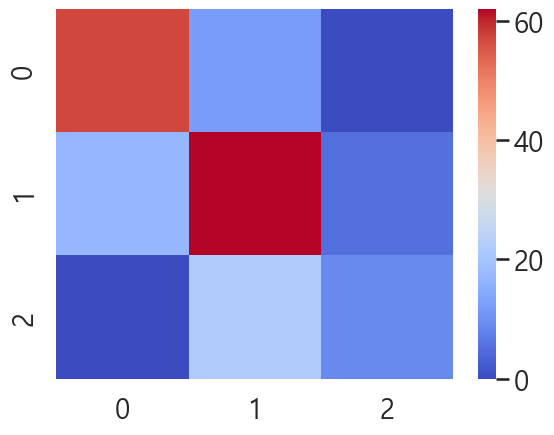

In [123]:
sns.heatmap(RF_matrix, cmap = "coolwarm")